In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\willh\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Creating new dataframes in order to use pd.concat() function

    # First Step: Add column for month to separate postings by month
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b') # '%b' is for 3 letter month name instead of capital '%B' which provides full month name


In [ ]:
# Step 2: Create dictionary for key and value of new dataframes
months = df['job_posted_month'].unique()

dict_months = {month : df[df['job_posted_month'] == month] for month in months}

# Running single key from dictionary to make sure it worked
dict_months['Jan']

In [11]:
# Now we will concatenate certain months of data

df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

<Axes: xlabel='job_posted_month'>

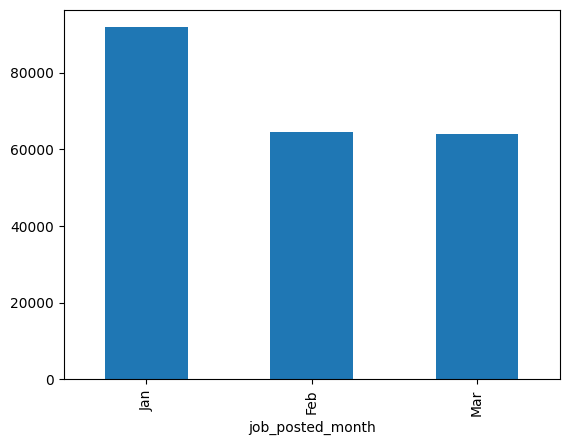

In [13]:
# Inspect it to see how it worked
df_q1['job_posted_month'].value_counts().plot(kind='bar')